In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import layers, models

In [3]:
(train_data, train_target), (test_data, test_target) = keras.datasets.mnist.load_data()
train_data = train_data.reshape(60000, 784).astype('float32') / 255
train_target = keras.utils.to_categorical(train_target, 10)
test_data = test_data.reshape(10000, 784).astype('float32') / 255
test_target = keras.utils.to_categorical(test_target, 10)

train_data_with_low_noise = np.clip(train_data + np.random.normal(0, 0.2, train_data.shape), 0, 1)
train_data_with_medium_noise = np.clip(train_data + np.random.normal(0, 0.4, train_data.shape), 0, 1)
train_data_with_high_noise = np.clip(train_data + np.random.normal(0, 0.6, train_data.shape), 0, 1)

test_data_with_low_noise = np.clip(test_data + np.random.normal(0, 0.2, test_data.shape), 0, 1)
test_data_with_medium_noise = np.clip(test_data + np.random.normal(0, 0.4, test_data.shape), 0, 1)
test_data_with_high_noise = np.clip(test_data + np.random.normal(0, 0.6, test_data.shape), 0, 1)

def run(model, batch_size = 256, number_of_iterations = 10, validation_split = 0.25, noise = 'low'): # low | medium | high
  model.compile(optimizer="adam", loss="mse")
  if noise == 'low':
    history = model.fit(train_data_with_low_noise, train_data, batch_size = batch_size, epochs = number_of_iterations, validation_split = validation_split)
  elif noise == 'medium':
    history = model.fit(train_data_with_medium_noise, train_data, batch_size = batch_size, epochs = number_of_iterations, validation_split = validation_split)
  elif noise == 'high':
    history = model.fit(train_data_with_high_noise, train_data, batch_size = batch_size, epochs = number_of_iterations, validation_split = validation_split)
  loss = -1.0
  if noise == 'low':
      loss = model.evaluate(test_data_with_low_noise, test_data)
  elif noise == 'medium':
    loss = model.evaluate(test_data_with_medium_noise, test_data)
  elif noise == 'high':
    loss = model.evaluate(test_data_with_high_noise, test_data)
  print("Train Loss: " + str(history.history['loss'][len(history.history['loss']) - 1]))
  print("Test Loss: " + str(loss))


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
model = models.Sequential([
    layers.Dense(100, input_dim= 28 * 28, activation='relu'),
    layers.Dense(28 * 28, activation='sigmoid')
])
run(model, number_of_iterations = 15)

Epoch 1/15
176/176 [==============================] - 3s 6ms/step - loss: 0.0629 - val_loss: 0.0345
Epoch 2/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0261 - val_loss: 0.0210
Epoch 3/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0180 - val_loss: 0.0158
Epoch 4/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 5/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 6/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 7/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 8/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 9/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0072 - val_loss: 0.0073

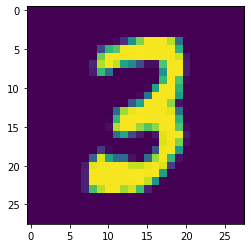

In [ ]:
random_index = np.random.choice(np.arange(len(test_data)))
plt.imshow(test_data[random_index].reshape(28, 28) * 255)

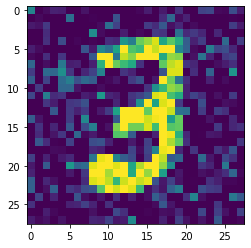

In [ ]:
plt.imshow(test_data_with_low_noise[random_index].reshape(28, 28) * 255)

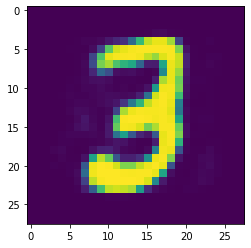

In [ ]:
plt.imshow(model.predict(test_data_with_low_noise[random_index].reshape((-1, 784))).reshape(28, 28) * 255)

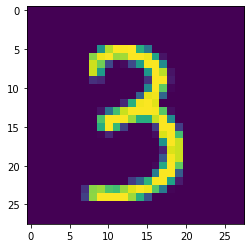

In [4]:
random_index = np.random.choice(np.arange(len(train_data)))
plt.imshow(train_data[random_index].reshape(28, 28) * 255)

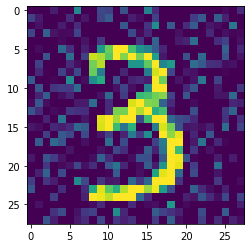

In [5]:
plt.imshow(train_data_with_low_noise[random_index].reshape(28, 28) * 255)

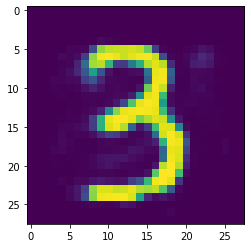

In [6]:
plt.imshow(model.predict(train_data_with_low_noise[random_index].reshape((-1, 784))).reshape(28, 28) * 255)

In [5]:
model = models.Sequential([
    layers.Dense(100, input_dim= 28 * 28, activation='relu'),
    layers.Dense(28 * 28, activation='sigmoid')
])
run(model, number_of_iterations = 15, noise = 'medium')

Epoch 1/15
176/176 [==============================] - 2s 7ms/step - loss: 0.0660 - val_loss: 0.0415
Epoch 2/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0333 - val_loss: 0.0279
Epoch 3/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0247 - val_loss: 0.0228
Epoch 4/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0209 - val_loss: 0.0198
Epoch 5/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 6/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0167 - val_loss: 0.0165
Epoch 7/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0155 - val_loss: 0.0154
Epoch 8/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 9/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0139 - val_loss: 0.0142
Epoch 10/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0134 - val_loss: 0.0137

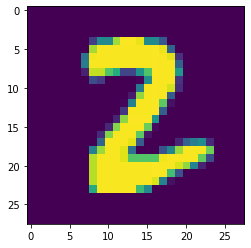

In [ ]:
random_index = np.random.choice(np.arange(len(test_data)))
plt.imshow(test_data[random_index].reshape(28, 28) * 255)

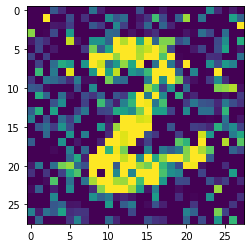

In [ ]:
plt.imshow(test_data_with_medium_noise[random_index].reshape(28, 28) * 255)

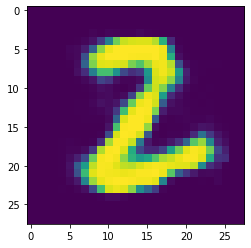

In [ ]:
plt.imshow(model.predict(test_data_with_medium_noise[random_index].reshape((-1, 784))).reshape(28, 28) * 255)

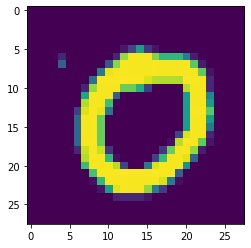

In [11]:
random_index = np.random.choice(np.arange(len(train_data)))
plt.imshow(train_data[random_index].reshape(28, 28) * 255)

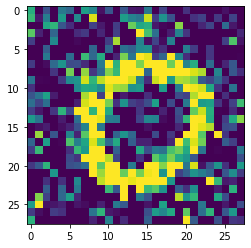

In [12]:
plt.imshow(train_data_with_medium_noise[random_index].reshape(28, 28) * 255)

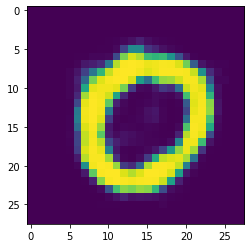

In [13]:
plt.imshow(model.predict(train_data_with_medium_noise[random_index].reshape((-1, 784))).reshape(28, 28) * 255)

In [6]:
model = models.Sequential([
    layers.Dense(100, input_dim= 28 * 28, activation='relu'),
    layers.Dense(28 * 28, activation='sigmoid')
])
run(model, number_of_iterations = 15, noise = 'high')

Epoch 1/15
176/176 [==============================] - 2s 7ms/step - loss: 0.0699 - val_loss: 0.0469
Epoch 2/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0398 - val_loss: 0.0350
Epoch 3/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0320 - val_loss: 0.0303
Epoch 4/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0283 - val_loss: 0.0275
Epoch 5/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0260 - val_loss: 0.0257
Epoch 6/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0244 - val_loss: 0.0244
Epoch 7/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0233 - val_loss: 0.0236
Epoch 8/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0225 - val_loss: 0.0229
Epoch 9/15
176/176 [==============================] - 1s 6ms/step - loss: 0.0219 - val_loss: 0.0224
Epoch 10/15
176/176 [==============================] - 1s 5ms/step - loss: 0.0213 - val_loss: 0.0219

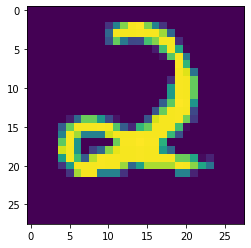

In [ ]:
random_index = np.random.choice(np.arange(len(test_data)))
plt.imshow(test_data[random_index].reshape(28, 28) * 255)

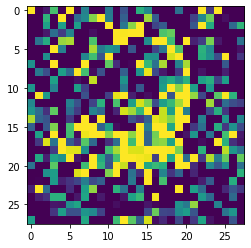

In [ ]:
plt.imshow(test_data_with_high_noise[random_index].reshape(28, 28) * 255)

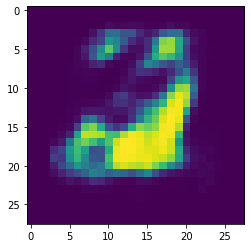

In [ ]:
plt.imshow(model.predict(test_data_with_high_noise[random_index].reshape((-1, 784))).reshape(28, 28) * 255)

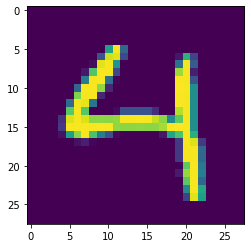

In [15]:
random_index = np.random.choice(np.arange(len(train_data)))
plt.imshow(train_data[random_index].reshape(28, 28) * 255)

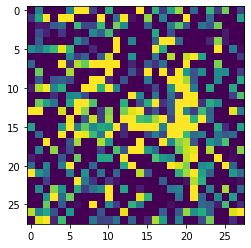

In [16]:
plt.imshow(train_data_with_high_noise[random_index].reshape(28, 28) * 255)

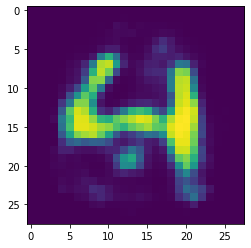

In [17]:
plt.imshow(model.predict(train_data_with_high_noise[random_index].reshape((-1, 784))).reshape(28, 28) * 255)